In [52]:
import torch
import numpy as np
import matplotlib.pyplot as plt
import torch.nn as nn
from sklearn import datasets

**Synthesizing BiData**

In [53]:
n_pts = 500
c_std = 0.4
xy_pts, label = datasets.make_circles(n_samples=n_pts, noise=0.1, factor=0.2)

xy_data = torch.Tensor(xy_pts)
label_data = torch.Tensor(label.reshape(n_pts, 1))

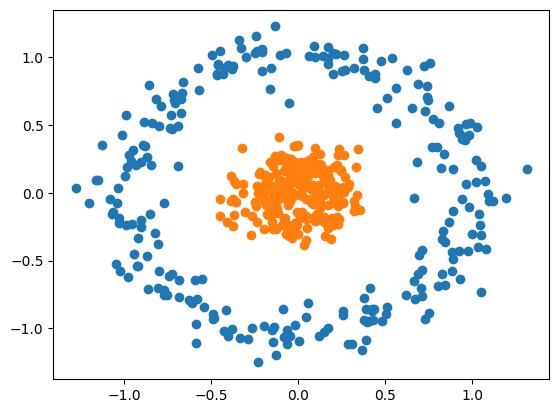

In [54]:
def scatter_plot():
  plt.scatter(xy_pts[label == 0, 0], xy_pts[label == 0, 1])
  plt.scatter(xy_pts[label == 1, 0], xy_pts[label == 1, 1])

scatter_plot()

**Constructing Digital Neural Network**

In [55]:
class DigitalNN(nn.Module):
  def __init__(self, in_size, H1, out_size):
    super().__init__()
    self.layer1 = nn.Linear(in_size, H1)
    self.layer2 = nn.Linear(H1, out_size)
    self.activation = nn.Sigmoid()

  def forward(self, x):
    x = self.activation(self.layer1(x))
    x = self.activation(self.layer2(x))
    return x
    """
    The process of Layered Processing <==> Cortical Processing
    """

  def reason(self, x):
    pred = self.forward(x)

    if pred >= 0.5:
      return 1

    else:
      return 0
    """
    -Probabilistic Modeling <==> Logical Reasoning
    """

In [56]:
model = DigitalNN(2, 4, 1)

w, b1, b2, b3 = model.parameters()

**Training & Optimizing Digital NN**

In [57]:
criterion = nn.BCELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.1)

In [58]:
epochs = 1000
losses = []

for i in range(epochs):
  label_pred = model.forward(xy_data)
  loss = criterion(label_pred, label_data)
  print("epoch:", i, "loss:", loss.item())
  losses.append(loss.item())
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

epoch: 0 loss: 0.698020875453949
epoch: 1 loss: 0.6941825747489929
epoch: 2 loss: 0.6964040994644165
epoch: 3 loss: 0.6933207511901855
epoch: 4 loss: 0.6914567947387695
epoch: 5 loss: 0.692028820514679
epoch: 6 loss: 0.6920362114906311
epoch: 7 loss: 0.6902643442153931
epoch: 8 loss: 0.6879479289054871
epoch: 9 loss: 0.6861664652824402
epoch: 10 loss: 0.6846792101860046
epoch: 11 loss: 0.682492196559906
epoch: 12 loss: 0.6790626645088196
epoch: 13 loss: 0.6746068000793457
epoch: 14 loss: 0.6695255637168884
epoch: 15 loss: 0.663843035697937
epoch: 16 loss: 0.657171368598938
epoch: 17 loss: 0.6491368412971497
epoch: 18 loss: 0.6397233009338379
epoch: 19 loss: 0.6292144656181335
epoch: 20 loss: 0.6178986430168152
epoch: 21 loss: 0.6058262586593628
epoch: 22 loss: 0.5928349494934082
epoch: 23 loss: 0.5788223743438721
epoch: 24 loss: 0.5639388561248779
epoch: 25 loss: 0.5484863519668579
epoch: 26 loss: 0.5326945781707764
epoch: 27 loss: 0.5166348218917847
epoch: 28 loss: 0.5003162026405334


Text(0.5, 0, 'epoch')

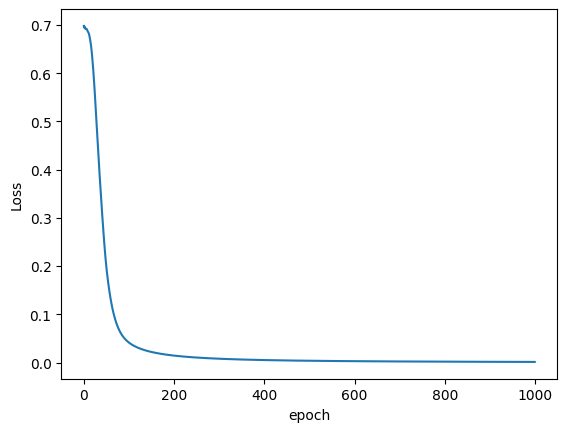

In [59]:
plt.plot(range(epochs),(losses))
plt.ylabel('Loss')
plt.xlabel('epoch')

**Visualizing Reasoning**

In [64]:
def plot_reasoning_boundary(X):
  '''
  -In a (A x A) grid, each y-coord can be
  associated with A different x-coords.
  -Each point in the grid is a combination of an (x and y) coords
  -END GOAL: a (A x A) Cartesian grid spanning the entire
  vertical & horizontal range of the data
  '''

  x_span = np.linspace(min(X[:, 0]), max(X[:, 0]))
  y_span = np.linspace(min(X[:, 1]), max(X[:, 1]))
  xx, yy = np.meshgrid(x_span, y_span)
  grid = torch.Tensor(np.c_[xx.ravel(), yy.ravel()])
  pred_func = model.forward(grid)
  z = pred_func.view(xx.shape).detach().numpy()
  plt.contourf(xx, yy, z)

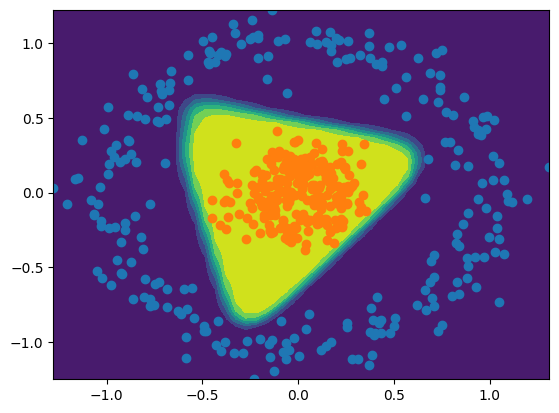

In [65]:
plot_reasoning_boundary(xy_pts)
scatter_plot()

**Infer Reason**

Inferred Reason: 1


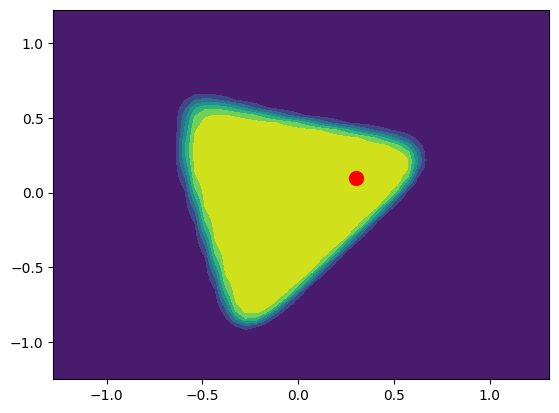

In [69]:
x = 0.3
y = 0.1
point = torch.Tensor([x, y])
infer_reason = model.reason(point)
print("Inferred Reason:", infer_reason)

plt.plot(x, y, marker='o', markersize='10', color='red')
plot_reasoning_boundary(xy_pts)